In [45]:
# HW1- a1

In [46]:
#Imported all the libraries that are helpful in implementing the code.
#googledrive of tamu emailid is mounted inorder to access tha data files
import matplotlib.pyplot as plt
import operator
import numpy as np
import pandas as pd
import io
import os
import math
import random
import statistics
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [47]:
#Training data, development data, test data is loaded into their respective dataframes
#names were given to each column for easier access and clarity
trainingdata = pd.read_csv('/content/gdrive/MyDrive/Data/data_train.csv', names = ['Age','Year of operation','positive axillary lymph nodes','class'])
devdata = pd.read_csv('/content/gdrive/MyDrive/Data/data_dev.csv', names = ['Age','Year of operation','positive axillary lymph nodes','class'])
testdata = pd.read_csv('/content/gdrive/MyDrive/Data/data_test.csv', names = ['Age','Year of operation','positive axillary lymph nodes','class'])







In [48]:
#a.i
#value_counts function gives the number of samples belonging to the respective classes
#The classes are not equally distributed because 173 samples belong to class 1 and 72 samples belong to class 2
count1 = trainingdata['class'].value_counts()
print(count1)

1    173
2     72
Name: class, dtype: int64


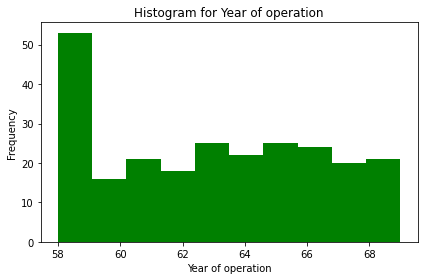

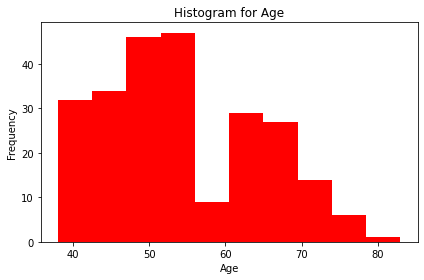

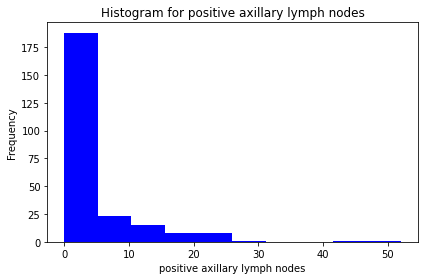

In [49]:
#a.ii
#All histograms are successfully plotted using plt.hist 
#
attributes = {'Age', 'Year of operation', 'positive axillary lymph nodes'}
colorattributes = {'Age': 'r', 'Year of operation' : 'g', 'positive axillary lymph nodes':'b'}
for i in attributes:
  plt.hist(trainingdata[i], bins = 10,color=colorattributes[i])
  #plt.hist(trainingdata[i], bins = 10, log = True) 
  #this helps to elevate the small portion of data with lower values in histogram for positive axillary lymph nodes
  plt.title('Histogram for ' +i)
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

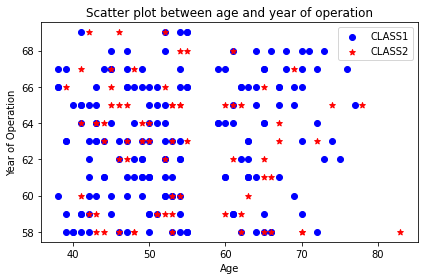

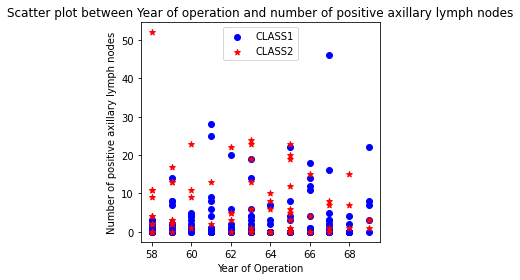

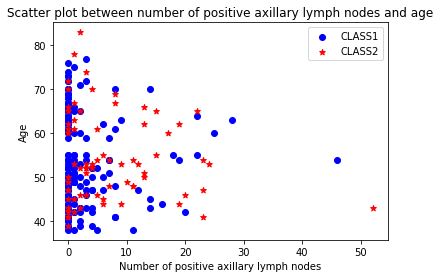

In [28]:
#a.iii
classwith1_age = []
classwith2_age = []

classwith1_year = []
classwith2_year = []

classwith1_nodes = []
classwith2_nodes = []

for i in range(len(trainingdata['class'])):
  if(trainingdata['class'][i] == 1):
    classwith1_age.append(trainingdata['Age'][i])
    classwith1_year.append(trainingdata['Year of operation'][i])
    classwith1_nodes.append(trainingdata['positive axillary lymph nodes'][i])
  if(trainingdata['class'][i] == 2):
    classwith2_age.append(trainingdata['Age'][i])
    classwith2_year.append(trainingdata['Year of operation'][i])
    classwith2_nodes.append(trainingdata['positive axillary lymph nodes'][i])

scatter1 = plt.scatter(classwith1_age, classwith1_year, color = 'b', marker = 'o', label = 'CLASS1')
scatter2 = plt.scatter(classwith2_age, classwith2_year, color = 'r', marker = '*', label = 'CLASS2')
plt.title("Scatter plot between age and year of operation")
plt.xlabel("Age")
plt.ylabel("Year of Operation")
plt.legend([scatter1,scatter2], ['CLASS1','CLASS2'])
plt.tight_layout()
plt.show()

scatter3 = plt.scatter(classwith1_year, classwith1_nodes, color = 'b', marker = 'o', label = 'CLASS1')
scatter4 = plt.scatter(classwith2_year, classwith2_nodes, color = 'r', marker = '*', label = 'CLASS2')
plt.title("Scatter plot between Year of operation and number of positive axillary lymph nodes")
plt.xlabel("Year of Operation")
plt.ylabel("Number of positive axillary lymph nodes")
plt.legend([scatter3,scatter4], ['CLASS1','CLASS2'])
plt.tight_layout()
plt.show()

scatter5 = plt.scatter(classwith1_nodes, classwith1_age, color = 'b', marker = 'o', label = 'CLASS1')
scatter6 = plt.scatter(classwith2_nodes, classwith2_age, color = 'r', marker = '*', label = 'CLASS2')
plt.title("Scatter plot between number of positive axillary lymph nodes and age")
plt.ylabel("Age")
plt.xlabel("Number of positive axillary lymph nodes")
plt.legend([scatter5,scatter6], ['CLASS1','CLASS2'])
plt.show()








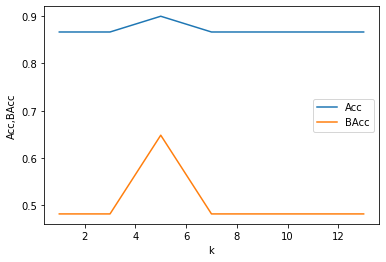

In [50]:
#b.i, b.ii
#function to calculate the euclidean distance
def eucld(x,y):
  distance = 0
  for i in range(len(x)):
    distance = distance + (x[i]-y[i])**2
  return (distance)**(1/2)
trainingdist=[]
for i in range((trainingdata.shape[0])):
  trainingdist.append(list(trainingdata.iloc[i, :]))

devdist =[]
for i in range((devdata.shape[0])):
  devdist.append(list(devdata.iloc[i, :]))

testdist=[]
for i in range((testdata.shape[0])):
  testdist.append(list(testdata.iloc[i, :]))


#function that returns the nearest k neighbors

def obtain_neighbours(k,rnum):
  neighbours = {}
  dist = 0
  last_neighbours = []
  for i in range(len(trainingdist)):
    dist = eucld(trainingdist[i],devdist[rnum])
    neighbours[i] = dist 
  sorted_dict = sorted(neighbours.items(), key=lambda item:item[1])
  for m in range(k):
    last_neighbours.append(sorted_dict[m])
  return last_neighbours

#implementation of KNN
knearest_neighbours = {}
temp = {}

k1 = [1,3,5,7,9,11,13]

accofdict = {}

for k in k1:
  for j in range(len(devdist)):
    knearest_neighbours[j] = obtain_neighbours(k,j)
  
  for i,j in enumerate(knearest_neighbours.values()):
    classlist = []
    for a,b in j :
      classlist.append(trainingdist[a][3])
    temp[i] = statistics.mode(classlist)

#Hyperparameter tuning is done by measuring accuracy and balanced accuracy by counting correctly classified and misclassified samples

  count_c1 = 0
  count_c2 = 0
  miscount_c1 = 0
  miscount_c2 = 0

  for i,j in enumerate(temp.values()): 
    if((j == devdist[i][3] and j == 1)):
      count_c1 = count_c1 + 1
    elif ((j == devdist[i][3] and j == 2)):
      count_c2 = count_c2 + 1
    elif (devdist[i][3] == 1):
      miscount_c1 = miscount_c1 + 1
    elif (devdist[i][3] == 2):
      miscount_c2 = miscount_c2 + 1

  accofdev = (count_c1 + count_c2)/len(devdist)
  baccofdev = (count_c1/(count_c1+miscount_c1) + count_c2/(count_c2 + miscount_c2))/2
  accofdict[k] = (accofdev,baccofdev)

acclist = []
bacclist = []
for i,j in accofdict.values():
  acclist.append(i)
  bacclist.append(j)

#plot between the Accuracy and balanced accuracy for different values of k
plt.xlabel('k')
plt.ylabel('Acc,BAcc')
plt.plot(k1,acclist, label = 'Acc')
plt.plot(k1,bacclist,label = 'BAcc')
a = plt.gca()
a.legend()

 

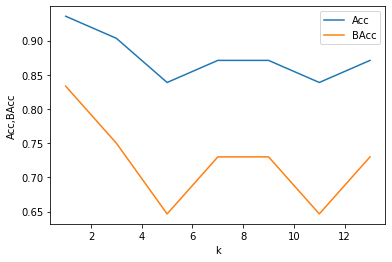

(0.8387096774193549, 0.6466666666666666)


In [51]:
#b.iii
#function that returns the nearest k neighbors

def obtain_neighbours(k,rnum):
  neighbours = {}
  dist = 0
  last_neighbours = []
  for i in range(len(trainingdist)):
    dist = eucld(trainingdist[i],testdist[rnum])
    neighbours[i] = dist 
  sorted_dict = sorted(neighbours.items(), key=lambda item:item[1])
  for m in range(k):
    last_neighbours.append(sorted_dict[m])
  return last_neighbours

#implementation of KNN
knearest_neighbours = {}
temp = {}

k1 = [1,3,5,7,9,11,13]

accofdict = {}

for k in k1:
  for j in range(len(testdist)):
    knearest_neighbours[j] = obtain_neighbours(k,j)
  
  for i,j in enumerate(knearest_neighbours.values()):
    classlist = []
    for a,b in j :
      classlist.append(trainingdist[a][3])
    temp[i] = statistics.mode(classlist)

   #measuring accuracy by counting correctly classified and misclassified samples

  count_c1 = 0
  count_c2 = 0
  miscount_c1 = 0
  miscount_c2 = 0

  for i,j in enumerate(temp.values()): 
    if((j == testdist[i][3] and j == 1)):
      count_c1 = count_c1 + 1
    elif ((j == testdist[i][3] and j == 2)):
      count_c2 = count_c2 + 1
    elif (testdist[i][3] == 1):
      miscount_c1 = miscount_c1 + 1
    elif (testdist[i][3] == 2):
      miscount_c2 = miscount_c2 + 1

  accoftest = (count_c1 + count_c2)/len(testdist)
  baccoftest = (count_c1/(count_c1+miscount_c1) + count_c2/(count_c2 + miscount_c2))/2
  accofdict[k] = (accoftest,baccoftest)

acclist = []
bacclist = []
for i,j in accofdict.values():
  acclist.append(i)
  bacclist.append(j)
plt.xlabel('k')
plt.ylabel('Acc,BAcc')
plt.plot(k1,acclist, label = 'Acc')
plt.plot(k1,bacclist,label = 'BAcc')
a = plt.gca()
a.legend()
plt.show()
print(accofdict[5])


[0.48148148148148145,
 0.48148148148148145,
 0.46296296296296297,
 0.48148148148148145]

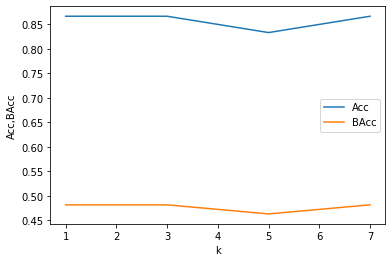

In [52]:
#b.iv
def l1norm(x,y):
  distance = 0
  for i in range(len(x)-1):
    distance = distance + abs(x[i]-y[i])
  return distance

trainingdist=[]
for i in range((trainingdata.shape[0])):
  trainingdist.append(list(trainingdata.iloc[i, :]))

devdist =[]
for i in range((devdata.shape[0])):
  devdist.append(list(devdata.iloc[i, :]))

testdist=[]
for i in range((testdata.shape[0])):
  testdist.append(list(testdata.iloc[i, :]))


#function that returns the nearest k neighbors

def obtain_neighbours(k,rnum):
  neighbours = {}
  dist = 0
  last_neighbours = []
  for i in range(len(trainingdist)):
    dist = l1norm(trainingdist[i],devdist[rnum])
    neighbours[i] = dist 
  sorted_dict = sorted(neighbours.items(), key=lambda item:item[1])
  for m in range(k):
    last_neighbours.append(sorted_dict[m])
  return last_neighbours

#implementation of KNN
knearest_neighbours = {}
temp = {}

k1 = [1,3,5,7]

accofdict = {}

for k in k1:
  for j in range(len(devdist)):
    knearest_neighbours[j] = obtain_neighbours(k,j)
  
  for i,j in enumerate(knearest_neighbours.values()):
    classlist = []
    for a,b in j :
      classlist.append(trainingdist[a][3])
    temp[i] = statistics.mode(classlist)

   #measuring accuracy by counting correctly classified and misclassified samples

  count_c1 = 0
  count_c2 = 0
  miscount_c1 = 0
  miscount_c2 = 0

  for i,j in enumerate(temp.values()): 
    if((j == devdist[i][3] and j == 1)):
      count_c1 = count_c1 + 1
    elif ((j == devdist[i][3] and j == 2)):
      count_c2 = count_c2 + 1
    elif (devdist[i][3] == 1):
      miscount_c1 = miscount_c1 + 1
    elif (devdist[i][3] == 2):
      miscount_c2 = miscount_c2 + 1

  accofdev = (count_c1 + count_c2)/len(devdist)
  baccofdev = (count_c1/(count_c1+miscount_c1) + count_c2/(count_c2 + miscount_c2))/2
  accofdict[k] = (accofdev,baccofdev)

acclist = []
bacclist = []
for i,j in accofdict.values():
  acclist.append(i)
  bacclist.append(j)

plt.xlabel('k')
plt.ylabel('Acc,BAcc')
plt.plot(k1,acclist, label = 'Acc')
plt.plot(k1,bacclist,label = 'BAcc')
a = plt.gca()
a.legend()
bacclist
